AUPRC (Logistic Regression): 0.48964493620693367


d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


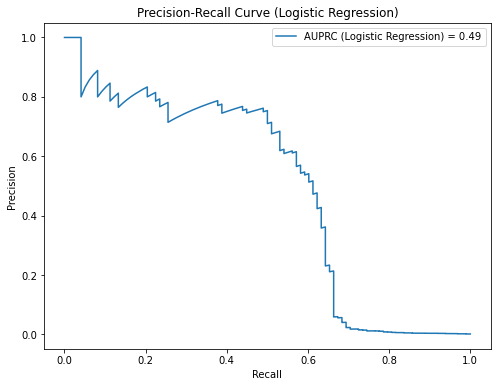

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv("Data/creditcard.csv")

# 划分数据集
X = data.drop("Class", axis=1)  # 特征
y = data["Class"]  # 目标变量

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择逻辑回归分类器
logreg_classifier = LogisticRegression(random_state=42)

# 训练分类器
logreg_classifier.fit(X_train, y_train)

# 预测概率
y_proba_logreg = logreg_classifier.predict_proba(X_test)[:, 1]

# 计算AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_proba_logreg)
auprc_logreg = auc(recall, precision)

# 打印AUPRC
print("AUPRC (Logistic Regression):", auprc_logreg)

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC (Logistic Regression) = {auprc_logreg:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend()
plt.show()
